In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
from scipy.stats import binned_statistic

In [4]:
mat_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
mat = np.genfromtxt(mat_dir + 'HOROLOGIUM_CF.2.TOSEND.CAT',names=True)

In [5]:
psf = np.genfromtxt(mat_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT',names=True)

In [6]:
cat = np.genfromtxt(mat_dir + 'HOROLOGIUM_CF.2.TOSEND.CAT')

In [7]:
ra, dec = -2,-1
m606c = 2
x, y = 0, 1
nstar = 4

In [8]:
cat_g = cat[cat[:,m606c]>10]

In [9]:
cat_sort = np.argsort(cat_g[:,m606c])[:50]

In [10]:
cat_g=cat_g[cat_sort]

In [11]:
out = cat_g[:,[ra,dec,x,y,nstar]]

In [12]:
# np.savetxt('aper50.dat',out,fmt='%1.7f %1.7f %1.5f %1.5f %d')

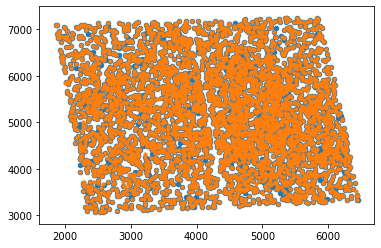

In [13]:
fig,ax = plt.subplots()

ax.scatter(mat['x'],mat['y'],s=20)
ax.scatter(psf['x'],psf['y'],s=10)


plt.show()

In [14]:
match = np.genfromtxt('catRawMags1305/catDir/matchedPSFaper1706_tc.dat',names=True)

In [15]:
g_idx = np.logical_and(match['m606cPSF']>12,match['m814cPSF']>12)
match_g = match[g_idx]

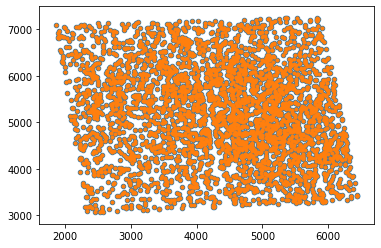

In [16]:
fig,ax = plt.subplots()

ax.scatter(match_g['xPSF'],match_g['yPSF'],s=20)
ax.scatter(match_g['xAPER'],match_g['yAPER'],s=10)


plt.show()

In [17]:
aper_i = match_g['m814cAPER']
aper_v = match_g['m606cAPER']
psf_i = match_g['m814cPSF']
psf_v = match_g['m606cPSF']

aper_c = aper_v - aper_i
psf_c = psf_v - psf_i

In [18]:
mean1 = np.mean(stats.sigmaclip(aper_v-psf_v,4,4)[0])
median1 = np.median(stats.sigmaclip(aper_v-psf_v,4,4)[0])

In [19]:
median2 = np.median(stats.sigmaclip(aper_i-psf_i,4,4)[0])
median3 = np.median(stats.sigmaclip(aper_c-psf_c,4,4)[0])

mean2 = np.mean(stats.sigmaclip(aper_i-psf_i,4,4)[0])
mean3 = np.mean(stats.sigmaclip(aper_c-psf_c,4,4)[0])

print(mean1,mean2,mean3)

0.10940997794928335 0.12238785425101215 -0.002534871214265513


In [20]:
mean1 = np.mean(aper_v-psf_v)
mean2 = np.mean(aper_i-psf_i)
mean3 = np.mean(aper_c-psf_c)

print(mean1,mean2,mean3)

-0.38058573615718294 0.17385315131411075 -0.5544388874712937


In [21]:
bin_means1, bin_edges1, binnum1= binned_statistic(psf_v, aper_v-psf_v, \
                    bins=10, range=(19.5, 29),statistic='mean')
bin_width = (bin_edges1[1] - bin_edges1[0])
bin_cent1 = bin_edges1[1:] - bin_width/2

bin_means2, bin_edges2, binnum2= binned_statistic(psf_i, aper_i-psf_i, \
                    bins=10, range=(19.5, 29),statistic='mean')

bin_width = (bin_edges2[1] - bin_edges2[0])
bin_cent2 = bin_edges2[1:] - bin_width/2

bin_means3, bin_edges3, binnum3= binned_statistic(psf_c, aper_c-psf_c, \
                    bins=10, range=(-1,2.5),statistic='mean')

bin_width = (bin_edges3[1] - bin_edges3[0])
bin_cent3 = bin_edges3[1:] - bin_width/2

bin_means4, bin_edges4, binnum4= binned_statistic(psf_v, \
        aper_v-psf_v, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges4[1] - bin_edges4[0])
bin_cent4 = bin_edges4[1:] - bin_width/2

bin_val4 = bin_means4/np.sqrt(len(psf_v))

bin_means5, bin_edges5, binnum5= binned_statistic(psf_i, \
        aper_i-psf_i, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges5[1] - bin_edges5[0])
bin_cent5 = bin_edges5[1:] - bin_width/2

bin_val5 = bin_means5/np.sqrt(len(psf_i))

bin_means6, bin_edges6, binnum6= binned_statistic(psf_c, \
        aper_c-psf_c, \
                    bins=10, range=(-1,2.5),statistic='std')

bin_width = (bin_edges6[1] - bin_edges6[0])
bin_cent6 = bin_edges6[1:] - bin_width/2

bin_val6 = bin_means6/np.sqrt(len(psf_c))

In [22]:
plt.rcParams['axes.grid'] = True

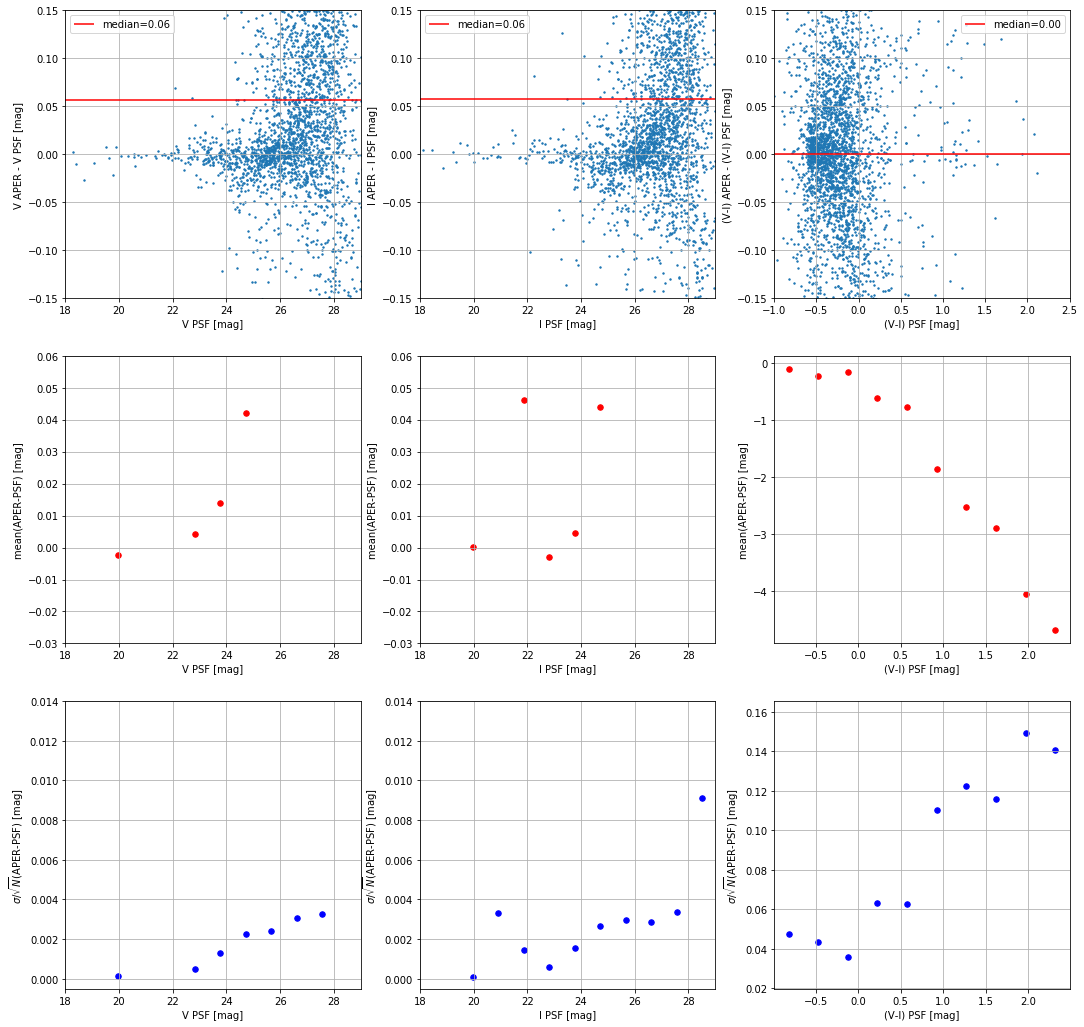

In [24]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = \
    plt.subplots(3,3,figsize=(18,18))

ax1.scatter(psf_v,aper_v-psf_v,s=2)
ax1.set_xlim(18,29)
ax1.set_ylim(-0.15,0.15)
ax1.hlines(median1,18,29,color='red',label='median={0:.2f}'.format(median1))
ax1.set_ylabel('V APER - V PSF [mag]')
ax1.set_xlabel('V PSF [mag]')
ax1.legend()

ax2.scatter(psf_i,aper_i-psf_i,s=2)
ax2.set_xlim(18,29)
ax2.set_ylim(-0.15,0.15)
ax2.hlines(median2,18,29,color='red',label='median={0:.2f}'.format(median2))
ax2.set_ylabel('I APER - I PSF [mag]')
ax2.set_xlabel('I PSF [mag]')
ax2.legend()

ax3.scatter(psf_c,aper_c-psf_c,s=2)
ax3.set_xlim(-1,2.5)
ax3.set_ylim(-0.15,0.15)
ax3.hlines(median3,-1,2.5,color='red',label='median={0:.2f}'.format(median3))
ax3.set_ylabel('(V-I) APER - (V-I) PSF [mag]')
ax3.set_xlabel('(V-I) PSF [mag]')
ax3.legend()

ax4.scatter(bin_cent1,bin_means1,s=30,color='red')
ax4.set_xlim(18,29)
ax4.set_ylim(-0.03,0.06)
ax4.set_ylabel('mean(APER-PSF) [mag]')
ax4.set_xlabel('V PSF [mag]')

ax5.scatter(bin_cent2,bin_means2,s=30,color='red')
ax5.set_xlim(18,29)
ax5.set_ylim(-0.03,0.06)
ax5.set_ylabel('mean(APER-PSF) [mag]')
ax5.set_xlabel('I PSF [mag]')

ax6.scatter(bin_cent3,bin_means3,s=30,color='red')
# ax6.set_xlim(-1,2.5)
# ax6.set_ylim(-0.03,0.06)
ax6.set_ylabel('mean(APER-PSF) [mag]')
ax6.set_xlabel('(V-I) PSF [mag]')

ax7.scatter(bin_cent4,bin_val4,s=30,color='blue')
ax7.set_xlim(18,29)
ax7.set_ylim(-0.0005,0.014)
ax7.set_xlabel('V PSF [mag]')
ax7.set_ylabel(r'$\sigma$/$\sqrt{N}$(APER-PSF) [mag]')

ax8.scatter(bin_cent5,bin_val5,s=30,color='blue')
ax8.set_xlim(18,29)
ax8.set_ylim(-0.0005,0.014)
ax8.set_xlabel('I PSF [mag]')
ax8.set_ylabel(r'$\sigma$/$\sqrt{N}$(APER-PSF) [mag]')

ax9.scatter(bin_cent6,bin_val6,s=30,color='blue')
# ax9.set_xlim(-1,2.5)
# ax9.set_ylim(-0.0005,0.014)
ax9.set_xlabel('(V-I) PSF [mag]')
ax9.set_ylabel(r'$\sigma$/$\sqrt{N}$(APER-PSF) [mag]')


# plt.show()
plt.savefig('aperMatchedpsf.png',dpi=600,bbox_inches='tight')

In [50]:
y = match_g['m814cPSF']-match_g['m814cAPER']
x = match_g['m814cPSF']

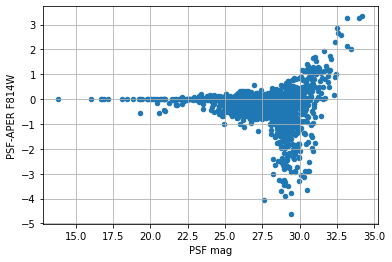

In [51]:
fig,ax = plt.subplots()

ax.scatter(x,y,s=20)

ax.set_ylabel('PSF-APER F814W')
ax.set_xlabel('PSF mag')

plt.show()

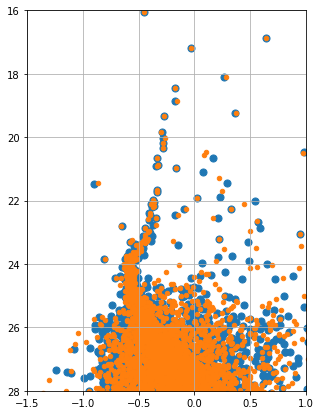

In [56]:
fig,ax = plt.subplots(figsize=(5,7))


ax.scatter(aper_c,aper_i,s=50,label='APER')
ax.scatter(psf_c,psf_i,s=20,label='PSF')

ax.set_ylim(28,16)
ax.set_xlim(-1.5,1)
plt.show()

In [60]:
print(-2.5*np.log10(0.770),-2.5*np.log10(0.611))
print(-2.5*np.log10(0.795),-2.5*np.log10(0.661))

0.2837731870687953 0.5348969743936145
0.24908217835882424 0.4494963512858994


In [63]:
print(np.log10(0.770),np.log10(0.611))
print(np.log10(0.795),np.log10(0.661))

-0.11350927482751812 -0.21395878975744578
-0.09963287134352969 -0.17979854051435976


In [66]:
print(np.log10(0.770)-np.log10(0.795))
print(np.log10(0.611)-np.log10(0.661))

-0.013876403483988428
-0.03416024924308603


In [62]:
print(-2.5*np.log10(0.764),-2.5*np.log10(0.603))
print(-2.5*np.log10(0.796),-2.5*np.log10(0.656))

0.29226660356077516 0.5492067196496218
0.24771733065582735 0.4577404015608493


In [64]:
print(np.log10(0.764),np.log10(0.603))
print(np.log10(0.796),np.log10(0.656))

-0.11690664142431006 -0.2196826878598487
-0.09908693226233094 -0.1830961606243397
